<h2><font color="#004D7F" size=6>Módulo 4. Fase de tratamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>3. Feature Importance</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Métricas de clasificación](#section2)
    * [2.1. Decision Trees](#section21)
    * [2.2. Extra Trees](#section22)
    * [2.3. Random Forest](#section23)
    * [2.4. LASSO](#section24)
* [3. Reducción de dimensiones](#section3)

In [42]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En resumen, feature selection, también llamado como selección de mejores características o atributos, es el proceso de seleccionar un subconjunto de características pertinentes (variables, predictores) para su uso en construcción de modelos. Las técnicas de feature selection son utilizadas por cuatro razones:
* Simplificación de modelos con el fin de hacerlas más sencillas de interpretar para los usuarios/investigadores.
* Menor tiempo de entrenamiento.
* Evitar la maldición de la dimensionalidad:
* Generalización realzada por reducir _overfitting_ (formalmente, reducción de varianza).

<a id="section11"></a>
## <font color="#004D7F"> 1.1. CSV</font>

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [40]:
# Clasification problem
import pandas as pd
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df_cla = pd.read_csv(filename, names=names)
array = df_cla.values
X_cla = array[:,0:8]
Y_cla = array[:,8]

In [39]:
#importing libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
wisconsin = load_breast_cancer()
df_wisconsin = pd.DataFrame(wisconsin.data, columns = wisconsin.feature_names)
X_wisconsin = wisconsin.data
y_wisconsin = wisconsin.target

* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas. En esta práctica lo trabajaremos directamente desde scikit-learn.

In [38]:
# Ya no esixte el dataset público por lo que lo cargamos directamente de nuestro CSV
# Regression problem
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
filename_reg = 'data/housing.csv'
names_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

df_reg = pd.read_csv(filename_reg, delim_whitespace=True, names=names_reg) 
array_reg = df_reg.values
X_reg = array_reg[:,0:13]
Y_reg = array_reg[:,13]

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Librerías</font>

Por último vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección.

In [37]:
#importing libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de Feature Importance</font>

La importancia de las características se puede estimar a partir de datos mediante la construcción de un modelo. Algunos métodos como los árboles de decisión tienen un mecanismo incorporado para informar sobre la importancia variable. Para otros algoritmos, la importancia se puede estimar utilizando un análisis de curva ROC realizado para cada atributo. Aunque veremos algunos de estos modelos pueden utilizarse muchos otros.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Decision Trees </font>

Los árboles de decisión hacen un particionamiento del espacio de entrada mediante una estrategia voraz. En cada paso, eligen la variable óptima. Si se limita la profundidad del árbol, también se limita el número de nodos y, por tanto, el número de variables, por ejemplo, un árbol (variables contínuas) con profundidad 5 tendría a como máximo 63 nodos (26 - 1). Por tanto, utilizaría, a lo sumo, 63 variables.

Podemos observar que el resultado que el mejor resultado se obtiene utilizando 6 de las 30 variables originales

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En el vídeo se puede ver una errata de que utilizo Regressor. Al ser un problema de clasificación hay que utilizar Classifier como se encuentra en el código de la caja.
</div> 

In [11]:
# Libraríes 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Genera la partición
X_train,X_test, Y_train, Y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=7)
# Aprende el modelo
depth=3
tree= DecisionTreeRegressor(criterion= 'friedman_mse', max_depth=depth)
#tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=7)
tree.fit(X_train, Y_train)


# Extrae los índices de las variables utilizadas
subset=np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
print(f"Variables :{X_wisconsin.shape[1]}")
print(f"Variables utilizadas :{subset}")
print(f"Trainning :{tree.score(X_train, Y_train).round(2)}")
print(f"Test :{tree.score(X_test, Y_test).round(2)}")
print(df_wisconsin.columns[1],df_wisconsin.columns[4],df_wisconsin.columns[21],df_wisconsin.columns[23],df_wisconsin.columns[26],df_wisconsin.columns[27])

Variables :30
Variables utilizadas :[ 1 18 21 23 26 27]
Trainning :0.9
Test :0.76
mean texture mean smoothness worst texture worst area worst concavity worst concave points


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En este caso tenemos que tener mucho cuidado con la profundidad del árbol que utilizamos porque podemos caer en _overfitting._
</div> 

Con la herramienta **graphviz** y **pydotplus** podemos ver como quedaría construído el árbol. En el caso de sistemas Linux deberás instalarla también en su máquina original `sudo apt install graphviz`.

In [18]:
#esto te lo instalas en el caso de que quieras las representaciones de los arboles para visualizarlas
#!pip install  graphviz

#!pip install pydotplus

    100% |████████████████████████████████| 286kB 1.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... error
  Complete output from command /home/manwest/Documentos/enviroment/modulo1/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-t5bvu1cr/pydotplus/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp7rsibbykpip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for pydotplus
  Running setup.py clean for pydotplus
Failed to build pydotplus
  Running setup.py install for pydotplus ... done


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
__Nota 1__: Para poder ver el árbol hay que proceder a la instalación de graphiz, en Linux, SO que tengo, se instala como está indicado. Para Windows se tendría que seguir los pasos del PDF que hay en esta misma sesión. Recuerda reniciar Anaconda una vez instaladas las librerías
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
__Nota 2__: La librería _six_ ha cambiado en la última versión, no modifique el código que se encuentra a continuación ya que en el vídeo se encuentra en una versión anterior.
</div> 

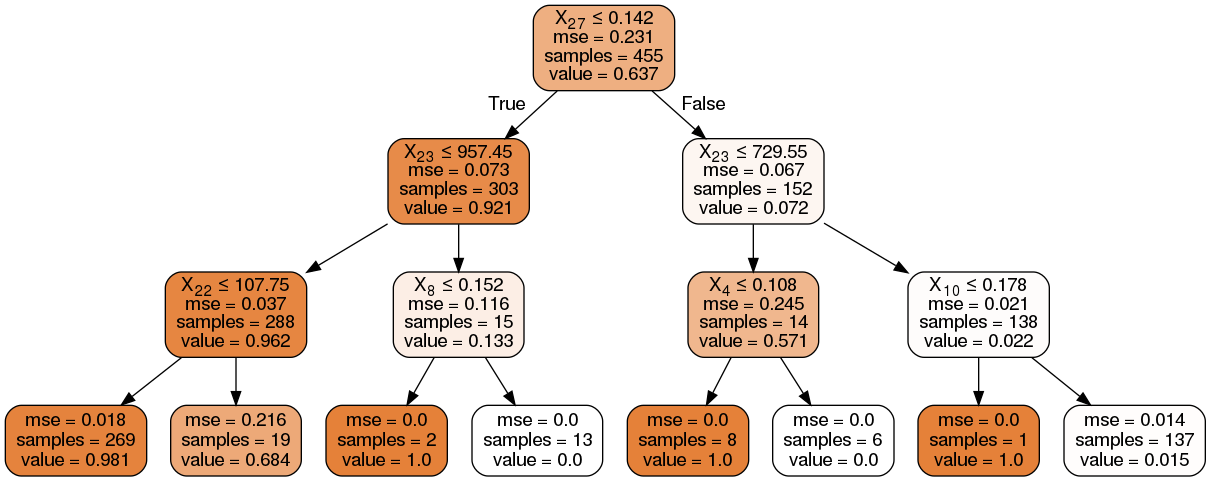

In [20]:
# PAra mostrar como ha generado el árbol
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
from six import StringIO

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Extra Trees </font>

Se pueden usar árboles de decisión tipo bagged como Random Forest y Extra Trees para estimar la importancia de las características. En el siguiente ejemplo, construimos un clasificador `ExtraTreesClassifier` para el inicio del conjunto de datos de diabetes de Pima Indians. 

Puede ver que se nos da un puntaje de importancia para cada atributo, donde cuanto mayor es el puntaje, más importante es el atributo. Los puntajes sugieren la importancia de _plas, age_ y _mass._

In [14]:
# Libraríes
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model=ExtraTreesClassifier()
model.fit(X_cla,Y_cla)
print(list(df_cla.columns))
print(model.feature_importances_)


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[0.11118815 0.22960891 0.09980973 0.07991319 0.07556096 0.13945119
 0.11967799 0.14478988]


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Puede obtener más información sobre la clase [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
</div> 

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Random Forest </font>

En su formulación original, el algoritmo Random Forest computa también la importancia de las variables

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Genera la partición
X_train, X_test, y_train, y_test = train_test_split(X_wisconsin, y_wisconsin, test_size=0.2, random_state=0)
# Entrenamos al algoritmo
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
# Extrae las importancias
importances = forest.feature_importances_
y_pred = forest.predict(X_test)
print(f"Error (con todas las variables): {accuracy_score(y_test, y_pred)}")

Error (con todas las variables): 0.9649122807017544


In [16]:
# Extrae los índices ordenados de menor a mayor
ranking = np.argsort(forest.feature_importances_)
print(wisconsin.feature_names[ranking])

['mean fractal dimension' 'concave points error' 'smoothness error'
 'mean symmetry' 'compactness error' 'perimeter error' 'mean smoothness'
 'fractal dimension error' 'texture error' 'symmetry error'
 'worst fractal dimension' 'mean compactness' 'concavity error'
 'worst symmetry' 'worst compactness' 'worst smoothness' 'mean texture'
 'worst texture' 'radius error' 'worst concavity' 'mean perimeter'
 'area error' 'mean radius' 'mean concavity' 'mean area'
 'worst concave points' 'worst area' 'mean concave points'
 'worst perimeter' 'worst radius']


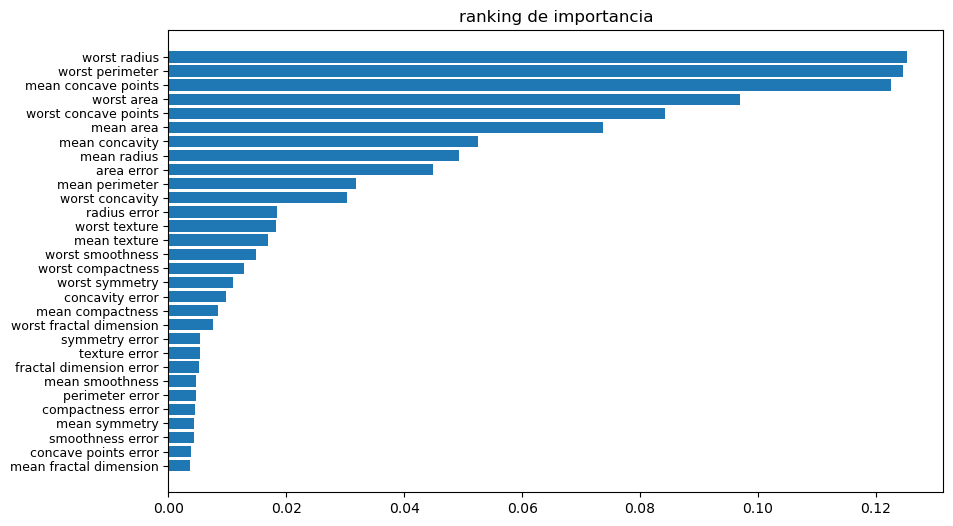

In [19]:
# Extrae los índices ordenados de menor a mayor
plt.figure(figsize=(10,6))
plt.title("ranking de importancia")
plt.barh(range(X_wisconsin.shape[1]), importances[ranking])
plt.yticks(range(X_wisconsin.shape[1]), wisconsin.feature_names[ranking],fontsize=9)
plt.show()
#ranking = np.argsort(forest.feature_importances_)

Y con estas características podemos ver si ha mejorado nuestros resultados eliminando las 5 características que, según Random Forest tenían menos importancia.

In [27]:
#voy a eliminar las 5 carac con menos importancia
forest.fit(X_train[:, ranking[-5:]],Y_train)
Y_pred= forest.predict (X_test[: , ranking[-5 : ]])
print(f"Error(sin ultimas 5 carac){accuracy_score(Y_test,Y_pred)}")

Error(sin ultimas 5 carac)0.5701754385964912


<a id="section24"></a>
## <font color="#004D7F"> 2.4. LASSO </font>

La importancia de las características se puede estimar a partir de los datos mediante la construcción de un modelo. Algunos métodos como los árboles de decisión tienen un mecanismo incorporado para informar sobre la importancia variable. Para otros algoritmos, la importancia se puede estimar utilizando un análisis de curva ROC realizado para cada atributo.

En este caso el modelo LASSO ha tomado todas las características excepto _NOX, CHAS_ e _INDUS._ Así mismo podemos utilizar otros modelos como RIDGE o Linear Regression por ejemplo.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
No cambiar el código que se encuentra en el cuadro ya que ha sido acatualizdo respecto al vídeo. 
</div> 

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importanceusing LASSO')

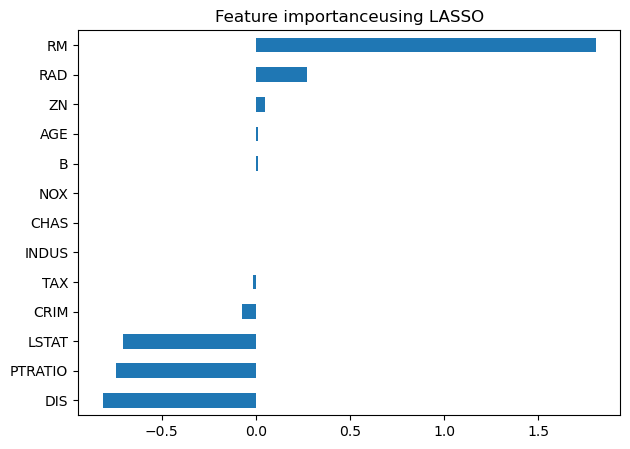

In [31]:
# Future imoprtance - LASSO
# Libraríes
from sklearn.linear_model import LassoCV
# feature importance
reg=LassoCV()
reg.fit(X_reg,Y_reg)
coef = pd.DataFrame(reg.coef_, df_reg.columns[0:13], columns=['Coefficient'])
# features picked and eliminated
print("Lasso picked " + str(sum(coef['Coefficient'] != 0)) + " variables and eliminated the other " 
      +  str(sum(coef['Coefficient'] == 0)) + " variables")
# Show de coeficient
imp_coef = coef['Coefficient'].sort_values()
plt.rcParams['figure.figsize']=(7.0,5.0)
imp_coef.plot(kind="barh")
plt.title("Feature importanceusing LASSO")


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Reducción de dimensiones </font>

PCA es un procedimiento estadístico que utiliza una transformación ortogonal que convierte un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas. Es decir, identifica pautas en nuestro dato basado en las correlaciones entre características. Esta correlación implica que hay redundancia en nuestros datos, en otras palabras, que hay parte de los datos que se pueden explicar por relaciones con otras partes de los mismos.

Estos datos correlacionados no son necesarios para el aprendizaje correcto del modelo, y por tanto pueden ser eliminados. Se pueden eliminar borrando directamente ciertas columnas (características) o combinando un número de ellos y obteniendo nuevos datos que contengan la mayoría de la información. 

En este caso podemos ver que hemos creado 3 componentes con PCA, es decir, hemos sustituido las características originales por los 3 componentes que nos da este tipo de transformación.

In [44]:
# Feature Extraction with PCA
# Libraríes
from sklearn.decomposition import PCA

# PCA con k=3
k=3
pca=PCA (n_components=k)
fit=pca.fit(X_cla)
# summarize components
C=pca.components_
print(f"Explained variance: {fit.explained_variance_ratio_}")
print(f"Components: {C}")
# Convertimos a dataframe
df_pca= pd.DataFrame(data=X_transform, columns=['PC1','PC2','PC3'])
df_pca

Explained variance: [0.88854663 0.06159078 0.02579012]
Components: [[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


NameError: name 'x_transform' is not defined

Vemos que casi toda la varianza es explicada usando solo un componente, por lo que podría decirse que dicho componente contiene casi toda la información de las features. Ahora veamos cuáles son las variables que contribuyen más a dicho componente:

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(pca.components_.T, cmap="Spectral", vmin=-1, vmax=1)
plt.yticks(range(len(df_cla.columns.values)), df_cla.columns.values)
plt.xticks(range(3), range(1, 4))
plt.xlabel("Componentes")
plt.ylabel("Contribución")
plt.title("Contribución de Features a Componentes")
plt.colorbar()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>